In [1]:
import sys
sys.path.insert(0, './renderer')
sys.path.insert(0, '../')

from collections import namedtuple
import render_car_instances as rci
import utils.utils as uts

%load_ext autoreload
%autoreload 2

Setting = namedtuple('Setting', ['image_name', 'data_dir'])
setting = Setting('180116_053947113_Camera_5', '../apolloscape/3d_car_instance_sample/')

# python3 render_car_instances.py --image_name='180116_065617963_Camera_5' --data_dir='../apolloscape/3d_car_instance_sample' --split=''


In [ ]:
%matplotlib inline
visualizer = rci.CarPoseVisualizer(setting)
visualizer.load_car_models()
image_vis, mask, depth = visualizer.showAnn(setting.image_name)

INFO:root:loading 79 car models


../apolloscape/3d_car_instance_sample/


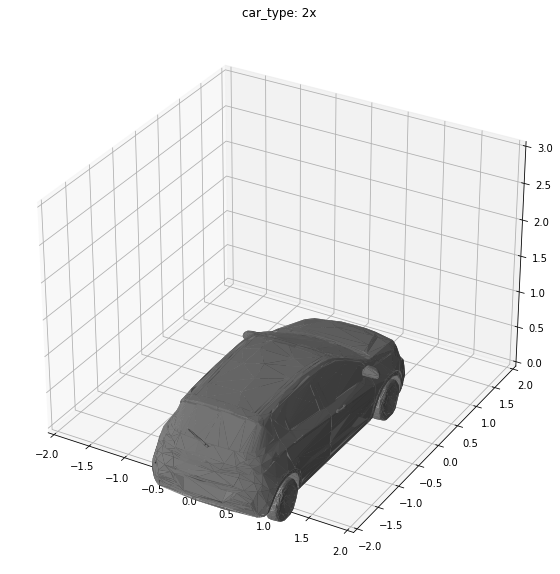

In [56]:
# Borrowed from https://www.kaggle.com/ebouteillon/load-a-3d-car-model

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


path = '../apolloscape/3d_car_instance_sample/car_models_json/'
model = 'baojun-310-2017.json'

with open(os.path.join(path, model)) as json_file:
    # load model as json
    data = json.load(json_file)
    
    # extract vertices
    vertices = np.array(data['vertices'])
    
    # extract triangles
    triangles = np.array(data['faces']) - 1
    
    # plot 3D model
    plt.figure(figsize=(20,10))
    ax = plt.axes(projection='3d')
    ax.set_title('car_type: '+data['car_type'])
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([0, 3])
    ax.plot_trisurf(vertices[:,0], vertices[:,2], triangles, -vertices[:,1], shade=True, color='grey')